# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [6]:
%run -i smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9900; alpha = 0.5000
Simulating trial. . . 
epsilo

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.10)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded 0.15)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.77)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

left
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.66)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

right
Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving right through 


None
Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.40)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('right', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.95)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.07)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.47)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.07)
40% 

Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9512; alpha =

Agent drove right instead of left. (rewarded 0.78)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.88)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.16)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.65)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.70)
76% of time remaining to reach destination.

/---------

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 1.33)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 1.40)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

right
Agent previous state: ('left', 'red', 'forward', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.53)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.95)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('left', 'green', None, 'left')
Agent drove ri

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.54)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

forward
Agent previous state: ('left', 'red', 'forward', 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.33)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded -0.06)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

forward
Agent previous state: ('left', 'red', 'forward', 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.79)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.32)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 10
\-------------------------

Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9048; alpha

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.89)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

forward
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.45)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'right', 'left')
Agent drove left instead of forward. (rewarded 1.04)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.65)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 11
\-------------------------

Simulating trial. . . 
epsilon = 0.8958; alpha 

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.06)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

forward
Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.15)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded -0.01)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

right
Agent previous state: ('left', 'green', 'forward', 'right')
Agent drove right instead of left. (rewarded 1.94)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1

\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.80)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.67)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.85)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.95)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------


Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.14)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 15
\-------------------------

Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8607; alpha

Simulating trial. . . 
epsilon = 0.8521; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8521; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8521; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

left
Agent previous state: ('right', 'green', None, 'forward')
Agent drove left instead of right. (rewarded 1.05)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

left
Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.50)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.10)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

left
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 1.8

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.89)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 2.78)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.39)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.39)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent prope

Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded 1.68)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.17)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.42)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.64)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.80)
76% of time r

None
Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.73)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.10)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.01)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 21
\-------------------------

Simulating trial. . . 
epsilon = 0.8106; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8106; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8106; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8106; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.8106; alpha = 0.5000
Si

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.03)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.76)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.14)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

left
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.45)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

right
Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. 

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.98)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('left', 'red', 'forward', 'right')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.65)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.49)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

left
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.13)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\----------


None
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.34)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.74)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

forward
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.82)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

right
Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.68)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('right', 'green', 'left', None)
Agent drove forward instead of right. (re

Agent previous state: ('right', 'green', None, 'right')
Agent drove forward instead of right. (rewarded 0.16)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.46)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.80)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 0.79)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 26
\-------------------------

Simulating trial. . . 
epsilon = 0.7

Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7634; alpha =

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded -0.05)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.13)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.44)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -41.00)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed 

Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.22)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.62)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.99)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 31
\-------------------------

Simulating trial. . . 
epsilon = 0.7334; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7334; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7334; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7334; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7334; alpha = 0.5000
Simu

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.70)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.26)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('right', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.61)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.97)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('right', 'red', 'left', 'forward')
Agent attempted driving left through a red light. (rewarded -9.10)
6

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 0.63)
32% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 34
\-------------------------

Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7118; alpha = 0

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.30)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 1.23)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.44)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.78)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right.

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 1.31)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', None)
Agent drove left instead of forward. (rewarded 0.04)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

right
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 0.77)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.08)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.69)
28% of time remaini

Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.08)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.92)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.10)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.06)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed t

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.86)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded 1.51)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

None
Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.00)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

forward
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.26)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

forward
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving forward th

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.74)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

right
Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.33)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

right
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 0.97)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

right
Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.92)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'left', 'left')
Agent drove forward instead of left. (rewarded -0.40)
10% of time remaining

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.16)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

forward
Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 1.70)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

right
Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 1.27)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.25)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewar

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.82)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.52)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'left', 'left')
Agent drove forward instead of left. (rewarded 1.79)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.02)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

right
Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 0.98)
48% of time remainin

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.09)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.93)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

None
Agent previous state: ('left', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.88)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.18)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (re

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove left instead of forward. (rewarded 1.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

forward
Agent previous state: ('right', 'green', 'left', 'left')
Agent drove forward instead of right. (rewarded 0.45)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.29)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'left', 'right')
Agent attempted driving forward through a red light. (rewarded -9.31)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('right', 'red', None, 'forward')
Agent attempted dri

Agent previous state: ('right', 'red', 'right', 'forward')
Agent attempted driving left through a red light. (rewarded -9.01)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.52)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 1.51)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.12)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarde

\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 0.69)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.18)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.78)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.48)
73% of time 


/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.14)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.16)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

left
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.47)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.47)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results


\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.01)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'right', None)
Agent drove forward instead of left. (rewarded 1.47)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.35)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.04)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.76)
30

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.74)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.29)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.47)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('left', 'green', 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.92)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 1.05)


Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.69)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.90)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.06)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 54
\-------------------------

Simulating trial. . . 
epsilon = 0.5827; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5827; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5827; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5827; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5827;

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.02)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'right', 'forward')
Agent attempted driving forward through a red light. (rewarded -10.23)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

right
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.84)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 55
\-------------------------

Simulating trial. . . 
epsilon = 0.5769; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5769; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5769; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5769; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5769;

Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded -0.15)
3% of time remaining to reach destination.

/-------------------
| Step 34 Results
\-------------------

None
Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded -0.83)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 56
\-------------------------

Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5712; alpha = 0.5

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.18)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.79)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.53)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.59)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.97)
50% of time remaining to rea

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.72)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.79)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.28)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.83)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.27)
35% of t

\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.44)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.32)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.31)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.08)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (reward

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 1.47)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.58)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.40)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

right
Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded -0.37)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.33)
20% of ti

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.65)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.03)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.90)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of f

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.01)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.96)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.31)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.26)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and ca

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.72)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.37)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.46)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

right
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.16)
72% of time remain

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.10)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.10)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 68
\-------------------------

Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.5066; alpha = 0.5000
Simulating trial. . . 
epsilon = 

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.82)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.33)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.55)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.96)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left',

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.25)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.87)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.95)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.80)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('left', 'green', 'right', 'forward')
Agent followed the waypoint left. (rewarded 1.39)
68% of time re

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.79)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('forward', 'red', 'right', 'left')
Agent attempted driving forward through a red light. (rewarded -10.16)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.53)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.79)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.78)


Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.31)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.61)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.45)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.12)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('left', 'red', None, 'forward')
Agent drove right instead of left. (rewarded 0.47)
70% of time 

Agent properly idled at a red light. (rewarded 2.51)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.70)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.16)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.28)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, 'right')
Agent drove left instead of forward. (rewarded 1.09)
64% of time remaining to reach destination.

/-------------------
| 

| Training trial 76
\-------------------------

Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4677; alpha = 0.5000


Simulating trial. . . 
epsilon = 0.4584; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4584; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4584; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4584; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4584; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.35)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.34)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous 

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.48)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove forward instead of left. (rewarded 0.58)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.51)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.74)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.92)
35% of ti

Agent previous state: ('forward', 'green', 'right', 'forward')
Agent drove left instead of forward. (rewarded 1.50)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.23)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

None
Agent previous state: ('right', 'green', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.66)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

None
Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.06)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.41)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 82
\-------------------------

Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4404; alpha = 0.

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.89)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.61)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.27)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.47)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.66)
45% of time remaining to 

| Step 9 Results
\-------------------

left
Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.57)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.16)
56% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 85
\-------------------------

Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4274; alpha = 0.5000
Sim

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.20)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

right
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.09)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.98)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.89)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.41)
80% of time remaining to

Agent previous state: ('right', 'red', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.18)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.61)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.72)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.65)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent proper

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove right instead of forward. (rewarded 1.32)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.12)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.26)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 90
\-------------------------

Simulating trial. . . 
epsilon = 0.4066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4066; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.4066; alpha = 0.5

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.97)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.86)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.51)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.76)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('left', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. 

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.03)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.24)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 0.15)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.10)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.11)
77% of time remainin

93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.55)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.53)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.18)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.84)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.42)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.04)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.10)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.78)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, None)
Agent drove right in

Agent previous state: ('left', 'red', 'left', 'right')
Agent drove right instead of left. (rewarded 1.15)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.06)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.35)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, 'right')
Agent drove forward instead of right. (rewarded 0.92)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('right', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 1.48)
40% of time remain

\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.77)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.99)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.59)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.39)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.88)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.44)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.11)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.15)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarde

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.40)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.19)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.00)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.17)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.83)
52% of time rema

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.53)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 1.27)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.12)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.98)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.33)
60% of time remaining to

| Step 1 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.40)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.58)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.39)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.89)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('forward', 'green', None, None)
Agent dr

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.96)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.45)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.77)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.60)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.45)
68% of time remaini


None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.62)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.04)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.96)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.50)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.28)
72% of time remaining to reach destin

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.28)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

None
Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded -0.30)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

None
Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.38)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.33)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

forward
Agent previous state: ('right', 'red', None, 'right')
Agent attempted driving forward through a red lig

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent drove left instead of right. (rewarded 1.82)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove left instead of forward. (rewarded 0.16)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('right', 'green', 'forward', None)
Agent drove left instead of right. (rewarded 0.83)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.11)
80% of 

epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3230; alpha = 0.5000
Simulating tria

epsilon = 0.3198; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3198; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3198; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.72)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.88)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.34)
84% of time remaining to reach destina

epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3135; alpha = 0.5000
Simulating tria


/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.99)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 118
\-------------------------

Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3073; alph

64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.24)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 120
\-------------------------

Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.3012; alpha = 

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.72)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.64)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.66)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

left
Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.45)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

left
Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded -0.11)
40% of time re

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.87)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.17)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.30)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'forward')
Agent drove right instead of forward. (rewarded -0.74)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

forward
Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.8

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.53)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.89)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.47)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded

/-------------------
| Step 17 Results
\-------------------

right
Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.14)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.68)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.68)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 126
\-------------------------

Simulating trial. . . 
epsilon = 0.2837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2837; alpha = 

/-------------------
| Step 0 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 1.89)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.78)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.15)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent

epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2753; alpha = 0.5000
Simulating tria

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.17)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.65)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.50)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.92)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 131
\-------------------------

Simulating trial. . . 
epsilon = 0.2698; alpha = 

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.67)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.67)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('left', 'green', None, 'left')
Agent drove right instead of left. (rewarded 1.62)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'green', 'right', 'right')
Agent followed the waypoint right. (rewarded 2.71)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.07)
50% of time remaini

Simulating trial. . . 
epsilon = 0.2618; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2618; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2618; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.56)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.11)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.44)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.41)


Agent previous state: ('right', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 0.19)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('right', 'green', 'right', 'forward')
Agent drove left instead of right. (rewarded 0.74)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 1.90)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.70)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.66)
45% of t

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.23)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.79)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.39)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.19)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 1.79)
55% of

epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2491; alpha = 0.5000
Simulating tria

Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2441; alpha =

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.62)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.14)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.69)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.97)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.46)
70% of time rema

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.70)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.39)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.66)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.49)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red lig

Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2322; alpha =

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.69)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.69)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.48)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.66)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.33)
5

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.79)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 150
\-------------------------

Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2231; alpha = 0.5000


Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.40)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.19)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.44)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.11)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.66)
48% of time remain

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.49)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.47)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.55)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.62)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause

epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2122; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.11)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.17)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.72)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.14)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.47)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 2.59)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 158
\-------------------------

Simulating trial. . . 
epsilon = 0.2060; alpha = 0.5000
Simul

72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 1.67)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 160
\-------------------------

Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2019; alpha = 0.5

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.03)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.14)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.07)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.83)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.64)
70% of time remain

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.11)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.51)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.88)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.09)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 164
\-------------------------

Simulating trial. . . 
epsilon = 0.1940; alpha = 0.5000

Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1920; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

left
Agent previous state: ('left', 'green', 'right', 'left')
Agent followed the waypoint left. (rewarded 2.39)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('forward', 'red', None

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.69)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.77)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.61)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.00)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.51)
75% of time remaining to reach 

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.60)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.52)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.96)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.89)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('right', 'green', 'right', None)
Agent drove left instead of right. (rewarded 0.05

epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1809; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.03)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent pr


/-------------------
| Step 10 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.81)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.72)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.71)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.18)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, No

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.20)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.42)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.99)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.85)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewa

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.26)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.07)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('right', 'green', 'forward', 'forward')
Agent drove left instead of right. (rewarded 0.43)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'red', None, 'forward')
Agent followed the waypoint right. (rewarded 2.21)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 2.22)
64% of time remain

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.72)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 178
\-------------------------

Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1686; alpha = 0.500

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 1.40)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.42)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

left
Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 0.85)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.06)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.25)
44% 

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.60)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.12)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 182
\-------------------------

Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1620; alpha = 0.50

Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.21)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

right
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.20)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.73)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.50)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.99)
53% of time remaining to r

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.03)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.52)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.85)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.45)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.18)
80% of time

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.17)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 2.73)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 187
\-------------------------

Simulating trial. . . 
epsilon = 0.1541; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1541; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1541; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1541; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1541; alpha =

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.58)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.66)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.66)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('forward', 'green', 'right', 'right')
Agent drove right instead of forward. (rewarded 1.05)
6

epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1481; alpha = 0.5000
Simulating tria

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.33)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.91)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.27)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.53)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarde

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.36)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 1.37)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.55)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.96)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 195
\-------------------------

Simulating trial. . . 
epsilon = 0.1423; alpha = 0.5000
Sim

epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1395; alpha = 0.5000
Simulating tria

epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1367; alpha = 0.5000
Simulating tria


/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.73)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.65)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.85)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.70)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.74)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.61)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.26)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.51)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.14)
64% of time

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.12)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.50)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.46)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.19)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.11)
56% of time remaining to reac

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.56)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.14)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.32)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.56)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.13)
10% of time rema

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.47)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.59)
28% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 207
\-------------------------

Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1262; alpha = 0.5000
Si

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.40)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.40)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.55)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.50)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic a


forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.50)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.55)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 2.18)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.27)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.23)


/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.92)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

forward
Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.39)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.49)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.00)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 2

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.15)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.17)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.01)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.59)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.74)
55% of time remaining 

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.45)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

left
Agent previous state: ('left', 'green', 'forward', None)
Agent followed the waypoint left. (rewarded 1.81)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 217
\-------------------------

Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1142; alpha = 0.5000
S

epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1119; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

forward
Agent previous state: ('right', 'green', None, 'right')
Ag

| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.37)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 222
\-------------------------

Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1086; alpha = 0.5000
Simulat

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.84)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.59)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.24)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.72)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

None
Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.40)
57% of time rema

epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.1054; alpha = 0.5000
Simulating tria

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.04)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.51)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.81)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.28)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.29)
71% of t

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.52)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.55)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'right', 'forward')
Agent drove left instead of forward. (rewarded 0.80)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'red', 'right', None)
Agent followed the waypoint right. (rewarded 2.00)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 1.77)
60% of time

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.15)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.13)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.90)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.24)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.80)
77% of time rem

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.41)
40% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 231
\-------------------------

Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0993; alpha =

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.82)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.48)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.00)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', 'left')
Age

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 1.21)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.50)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.74)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.74)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.76)
50% of time remaining to reach

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.38)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.93)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.85)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.77)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 237
\-------------------------

Simulating trial. . . 
epsilon = 0.0935; a

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.34)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.74)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.06)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.57)
56% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 239
\-------------------------

Simulating trial. . . 
epsilon = 0.0916; alpha = 0.5000
Simulating tr

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.49)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

right
Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.71)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.07)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.10)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.74)
76% of time remainin

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.17)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.91)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.66)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.65)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 1.13)
8% of time remaining to re

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.52)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.97)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.76)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.62)
52% of t

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.52)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

forward
Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.10)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.58)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.60)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

right
Agent previous state: ('left', 'red', None, None)
Agent drove right inste

Agent previous state: ('right', 'green', None, 'right')
Agent drove forward instead of right. (rewarded 0.15)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.26)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.73)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 248
\-------------------------

Simulating trial. . . 
epsilon = 0.0837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0837; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0837; alpha = 0.5000
Simulating

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.20)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.34)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 1.17)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.67)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.77

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.83)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 253
\-------------------------

Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0797; alpha = 0

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.17)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.67)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.57)
63% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 255
\-------------------------

Simulating trial. . . 
epsilon = 0.0781; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0781; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0781; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0781; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0781; alpha = 0.5000
Simulatin

epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.5000
Simulating tria

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.57)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.39)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.10)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.82)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.76)
28

Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0750; alpha =

\-------------------

right
Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 1.03)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.34)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

left
Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.18)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.05)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red lig

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.86)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.86)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.45)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.27)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.50)
64% of 

Agent followed the waypoint forward. (rewarded 2.57)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.16)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.55)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.16)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.29)
80% of time remaining to reach destination.

/-------------------
| Step 6 Res

Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0714; alpha =

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.64)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.30)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('left', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.70)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.03)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.48)
50% of time remaining to reach destinatio

Simulating trial. . . 
epsilon = 0.0672; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0672; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0672; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0672; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0672; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.40)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 2.03)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.31)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\----------------

epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0659; alpha = 0.5000
Simulating tria

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.95)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 0.99)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.70)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.07)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

right
Agent previous state: ('forward', 'red', 'right', 'forward')
Agent drove right instead of forward. (rewarded 1.67)
80% o

Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0633; alpha =

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.81)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.27)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.15)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.55)
72% of time remaining to re

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.87)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.79)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.10)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.23)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.98)
55% of time remaining to 

\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.31)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.67)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.80)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.99)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('forward', 'green', 'right', 'right')
Agent drove right instead of forward. (rew

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.16)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 2.57)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

right
Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.43)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

right
Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.62)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 1.94)
68% of time rema

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.45)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.28)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 1.33)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.53)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.40)
7

epsilon = 0.0573; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.75)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.43)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.26)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.63)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

left
Agent previous state: ('left', 'green', None, Non

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.05)
53% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 288
\-------------------------

Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0561; alph

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.92)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.28)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.78)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.97)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.63)
50% of time remain

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.40)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.94)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.30)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.82)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.02)
60% of time rema

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.71)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.67)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

left
Agent previous state: ('forward', 'green', 'forward', 'left')
Agent drove left instead of forward. (rewarded 0.78)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

right
Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.38)
60% of time re

epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0523; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.71)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

None
Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.22)
90% of time 

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.76)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.08)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.86)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.00)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.84)
76% of time 

Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.0503; alpha =

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.10)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

forward
Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.33)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.25)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.59)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.98)
45% of time rem

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.28)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

left
Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 1.82)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.20)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.36)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.60)
77% of time remaining to r

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.53)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.66)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

None
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.61)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

forward
Agent previous state: ('forward', 'green', 'right', 'left')
Agent followed the waypoint forward. (rewarded 2.20)
77% of time 

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

None
Agent previous state: ('left', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.53)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

right
Agent previous state: ('left', 'red', 'right', 'right')
Agent drove right instead of left. (rewarded 1.18)
90% of time remaining to reach destination.

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.47)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 9
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.00

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.63)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

Simulation ended. . . 


### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

After observing the simulation for a number of minutes I note that the smartcab is at an intersection and does not move. Traffic lights alternatively change between green and red. While at the intersection, when there is a red light, the agent gets a positive reward. When the light changes to green and there is no oncoming traffic, the agent gets a negative reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

agent.py:
- learning - determines whether the agent should or should not learn. Set to true or false. When true, the agent is forced to use Q-Learning in the simulation, else the agent does not use Q-learning.
- epsilon - the exploration factor, set between 0 and 1. Determines the probability with which an agent chooses an action. Determines the importance of future rewards. When 0, the agent only considers immediate rewards. When 1, the agent strives for long-term high rewards. Usually set to one, meaning a lot of exploration and it steadily reduces as the agent learns more about its environment.
- alpha - the learning factor, set between 0 and 1. Determines to what extent new information overrides old information. When 0, the agent learns nothing. When 1, the agent considers only the most recent information.

environment.py
- act() - considers an action and performs an action if legal. A reward is given to the agent based on traffic laws.

simulator.py
- render_text() - displays simulation data output, in text format, in the terminal
- render() - display a GUI window with a visual display of the road network with intersections and moving cars, traffic lights and our smartcab. It also displays status text about each step

planner.py
- The function first considers if the destination is East or West of location

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


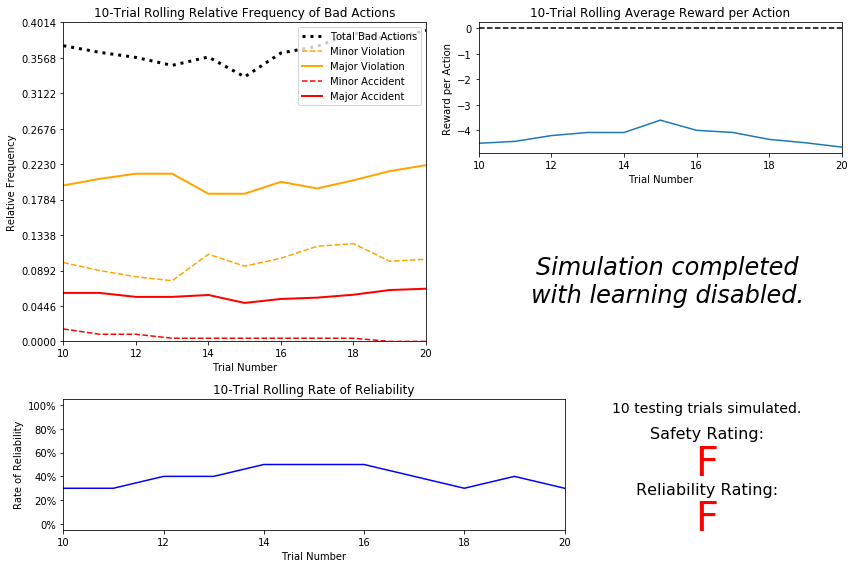

In [9]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The agent's frequency of bad decisions is around 37%. Of these, around 17% cause accidents.
- The average rate of reliability is around 30%. This figure is quite high given that the agent is driving randomly. However, this could be explained by the fact that the destination was not provided hence random intersection points chosen as destinations.
- Throughout the trials, the agent constantly receives negative rewards averaging -4.5. The frequency of bad decisions the agent makes, explains the penalties it receives.
- When you look at both the rate of reliability and average reward per action graphs, as the number of of trials increases the result steadily increases, and peaks when the number of trials is 15. After the 16th trial, the results steadily decreases up to the end of the trials.
- From the observation above, the smartcab should considered both unsafe and unreliable. The agent's score on both metrics was F. The agent could not get to the destination on time and had cause at least one major accident.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Features chosen are waypoint, light, left and oncoming. 

We need to know, the agents intended direction of travel to choose the appropriate action. We also need to observe traffic light at an intersection to avoid collisions.

The agent needs to know the intended action of both oncoming vehicles and vehicles on the left given the current waypoint, and traffic light status to avoid collisions.

The agent does not need to know where the vehicle coming from the right needs to turn because according to US right-of-way rules, we never need to know where the vehicle on our right intends to turn. I also did not include deadline. We are trying to get the agent to learn traffic rules at intersection. We do not want the agent penalized for actions it takes at an intersection because it wants to beat the deadline. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Using the features above, we have waypoint(3 possible actions), light(2 possible status), left(4 possible actions), and oncoming(4 possible actions). The size of the state space would therefore be 3 x 2 x 4 x 4 = 96 possible states

Given the state space size, the number of trials needed to learn the optimal policy would have to be larger than the state size. Over a 1000 trials would be needed.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

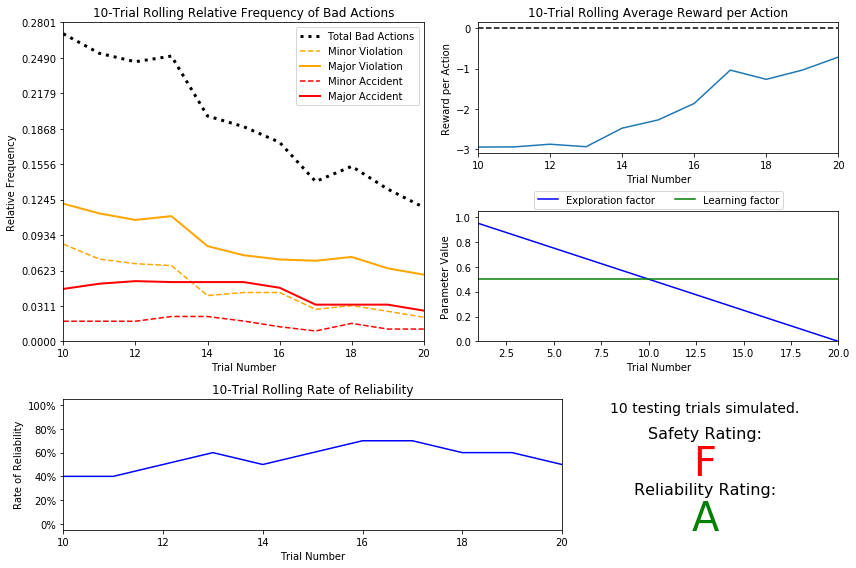

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

There are noticeable differences between the basic driving agent and the default q-learning agent. For the default q-learning agent, the number of total bad actions decreased as the number of training trials increased. Reliability was constant during training and started to slowly increase from trial 11. But it increased as it decreased slightly throughout the training. The reward, though still negative after 20 training trials, consistently increased from trial 13 as the number of training trials increased. Comparing to the basic driving agent, both reliability and reward were almost constant throughout the training, and only slightly peaked at trial 15. Total bad actions was also constant throughout the training in the basic agent.

For the default q-learning agent, I used a linear decaying function for the exploration factor (epsilon). I used a decay constant of 0.05 which resulted into 20 training trials. In the parameter value graph, epsilon linearly decreased as the number of training trials increased. The learning factor, alpha, was set to a constant value of 0.5 and was also reflected in the parameter value graph. 

The default q-learning agent's ratings were better than the basic agent's. With 20 training trials, the safety rating score was still F. Reliabilty rating was A. Rating score is dependent on the number of training trials, given the linear decaying function. With higher training trials, say 2000, both ratings would increase to A+.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

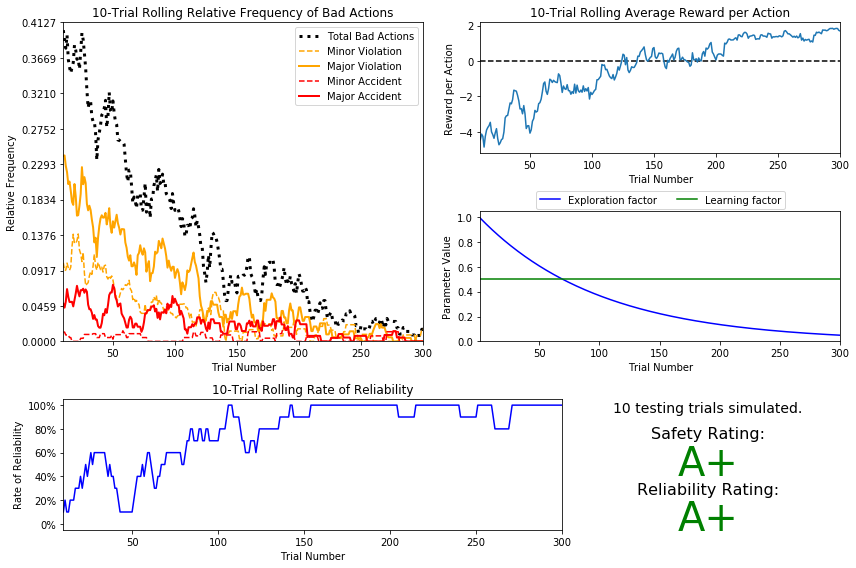

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

In this improved q-learning simulation, I used an exponential decaying function for the exploration factor, epsilon. I used a decay constant value of 0.01 which resulted into 300 training trials. I have used 0.01 because I wanted a significant number of training trials so that the agent performs optimally while testing. The epsilon-tolerance was 0.05 as it a small value and slightly larger than zero. I used a constant learning rate of 0.5. 

In this improved q-learning simulation, the performance, with just 300 trials was impressive. Reliability steadily increased and after 150 trials, it was near absolute. The reward also consistently and gradually increased as the number of training trials increased and became positive after 185 trials. 

After just 300 training trials, the agent performed as expected, both rate of reliability and average reward per action increased steadily. Both safety and reliabilty ratings were A+. These results indicate that the agent has successfully learned the optimal policy.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

- Optimal policy:
    - If waypoint is forward
        - If the light is red, wait
        - Otherwise, if the light is green, move forward
    - If waypoint is left
        - If the light is red, wait
        - Otherwise, if the light is green, and there is no oncoming traffic moving forward, turn left
    - If waypoint is right
        - If the light is red and traffic on the left is moving forward, wait
        - Otherwise, turn right
- Most recorded policies adhere to the optimal policy. For example:
    - ('forward', 'green', 'right', 'right', 'left')
         -- forward : 1.23
         -- right : 0.00
         -- None : 0.00
         -- left : 0.00
      The agent's waypoint is forward. The light is green, both oncoming traffic and traffic from the left is moving right, and traffic from the right is moving left. The action that will optimize the policy, forward, has the highest Q-value.
      
    - ('right', 'red', None, 'right', 'left')
         -- forward : -4.56
         -- right : 1.59
         -- None : 0.00
         -- left : -5.08
      The agent's waypoint is right. the light is red, and traffic on the left is moving right. The action which optimizes the policy, right has the highest Q-value
      
      
- There are instances where the policy learned was not the optimal policy. for example:
    - ('right', 'red', None, 'right', 'forward')
         -- forward : 0.00
         -- right : 0.00
         -- None : 0.64
         -- left : -5.33
      In this case, the most optimal action would be to move right since there is no traffic coming from the left. However, the action with the highest Q-value is 'None'.
      
    - ('right', 'red', 'right', 'left', 'forward')
         -- forward : 0.00
         -- right : 0.00
         -- None : 0.56
         -- left : -4.95
      In this instance, the most optimal action for the agent would be to move right since traffic from left is moving right. The action 'None' has been accorded the highest Q-value. 
      
 In the two policies above, although the action 'right' would be optimal, the action 'None' has the highest Q-value. Could be the agent, given the red light, choose to do nothing to avoid a violation, even though left traffic was not moving forward. Also the policies above were recorded in the initial stages of the trials, so the agent was still learning.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

For the smartcab, the agent gets penalized when it is not in violation. There are many instances in which the agent does not commit a violation. Across these instances, waypoint is one factor that the agent can learn from whenever it get's penalized. So, if an agent does not follow the suggested waypoint, it gets penalized and continously learns from these penalties. The agent does not get penalized (hence does not learn), by knowing which intersection is closer to the destination. It cannot compare between multiple paths. It cannot make a comparison between a reward now and a large reward later because it does not know how long is the later.

In the current environment, the destination changes at each step. If the destination remained the same throughout the trial, the agent would know which state/intersection would bring it closer to the destination. The agent would be able propagate back rewards of each intersection that would have brought it closer to the fixed destination. But in the current environment, where we would be propagating back from a destination that changes at each step, after a number of trials, we would be propagating back from every intersection that was once a destination.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.